# 1.Understanding the Data:

Import necessary libraries (e.g., pandas, matplotlib, seaborn).<br>
Load the COVID-19 dataset.<br>
Display basic information about the dataset (e.g., data types, missing values).<br>

In [1]:
# load required libraries/modules
import pandas as pd
# Load the dataset
df=pd.read_csv(r"C:\Users\Vikram Kshirsagar\Downloads\covid_19_data.csv")
# Display basic information about the dataset
df.head()


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [2]:
df.shape



(306429, 8)

In [3]:
df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [4]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,306429.000000,3.064290e+05,306429.000000,3.064290e+05
mean,153215.000000,8.567091e+04,2036.403268,5.042029e+04
std,88458.577156,2.775516e+05,6410.938048,2.015124e+05
min,1.000000,-3.028440e+05,-178.000000,-8.544050e+05
25%,76608.000000,1.042000e+03,13.000000,1.100000e+01
50%,153215.000000,1.037500e+04,192.000000,1.751000e+03
75%,229822.000000,5.075200e+04,1322.000000,2.027000e+04
max,306429.000000,5.863138e+06,112385.000000,6.399531e+06


In [5]:
df.dtypes

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

In [6]:
df['Province/State'].unique()

array(['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu',
       'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai',
       'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Taiwan',
       'Tianjin', 'Tibet', 'Washington', 'Xinjiang', 'Yunnan', 'Zhejiang',
       nan, 'Unknown', 'Chicago', 'Illinois', 'California', 'Arizona',
       'Ontario', 'New South Wales', 'Victoria', 'British Columbia',
       'Bavaria', 'Queensland', 'Chicago, IL', 'South Australia',
       'Boston, MA', 'Los Angeles, CA', 'Orange, CA', 'Santa Clara, CA',
       'Seattle, WA', 'Tempe, AZ', 'San Benito, CA', 'Toronto, ON',
       'London, ON', 'Madison, WI', 'Cruise Ship',
       'Diamond Princess cruise ship', 'San Diego County, CA',
       'San Antonio, TX', 'Ashland, NE', 'Travis, CA',
       'From Diamond Princess', 'Lackland, TX', 'Humbo

In [2]:
cat=[]
con=[]

for i in df:
    if df[i].dtypes==object:
        cat.append(i)
    else:
        con.append(i)

In [8]:
cat

['ObservationDate', 'Province/State', 'Country/Region', 'Last Update']

In [9]:
con

['SNo', 'Confirmed', 'Deaths', 'Recovered']

# 2. Data Cleaning:

In [ ]:
Handle missing values.
Convert data types if necessary.
Check for duplicates.

In [10]:
# Handle missing values
df.isna().sum()

# Convert data types if necessary ( ObservationDate    datetime64[ns]) change to datetime

# df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

# Check for duplicates
# print("Number of duplicates:", df.duplicated().sum())


SNo                    0
ObservationDate        0
Province/State     78103
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [11]:
#fill the data
df['Province/State'].mode()


0    Unknown
Name: Province/State, dtype: object

In [12]:
#use fillina
for i in df:
    if df[i].dtypes==object:
        mo=df[i].mode()[0]
        df[i]=df[i].fillna(mo)
        
        
        

In [11]:
df['Province/State'].value_counts()

Province/State
Unknown                         4123
Amazonas                        1109
Diamond Princess cruise ship     924
Grand Princess                   882
Punjab                           708
                                ... 
Harrison County, KY                1
Queens County, NY                  1
Johnson County, IA                 1
Unassigned Location, VT            1
Charlotte County, FL               1
Name: count, Length: 736, dtype: int64

In [13]:
df.isna().sum()


SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

# 3. Descriptive Statistics:

Generate descriptive statistics (mean, median, min, max) for numeric columns.<br>
Explore summary statistics for categorical columns.

In [4]:
# Descriptive statistics


# Summary statistics for categorical columns

print(df['Country/Region'].value_counts())

Country/Region
Russia                 30251
US                     26740
Japan                  18059
Mainland China         15758
India                  13182
                       ...  
 Azerbaijan                1
North Ireland              1
Republic of Ireland        1
Cape Verde                 1
East Timor                 1
Name: count, Length: 229, dtype: int64


In [14]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,306429.000000,3.064290e+05,306429.000000,3.064290e+05
mean,153215.000000,8.567091e+04,2036.403268,5.042029e+04
std,88458.577156,2.775516e+05,6410.938048,2.015124e+05
min,1.000000,-3.028440e+05,-178.000000,-8.544050e+05
25%,76608.000000,1.042000e+03,13.000000,1.100000e+01
50%,153215.000000,1.037500e+04,192.000000,1.751000e+03
75%,229822.000000,5.075200e+04,1322.000000,2.027000e+04
max,306429.000000,5.863138e+06,112385.000000,6.399531e+06


# 4. Time Series Analysis:

Analyze the trends in confirmed, deaths, and recovered cases over time.<br>
Create time-based visualizations.

In [ ]:
# Time series analysis
# groupby 'ObservationDate' and apply aggregation functions like sum on deaths,confirmed ,recovered 
# df_time = df.groupby('ObservationDate').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})

# Plot time series data using line plot

# syntax: 
#sns.lineplot(data=df_time, x='ObservationDate', y='Confirmed', label='Confirmed')
# sns.lineplot(data=df_time, x='ObservationDate', y='Deaths', label='Deaths')




In [18]:
#groupby 
df_time=df.groupby("ObservationDate").agg({"Confirmed":"sum","Deaths":"sum","Recovered":"sum"})
df_time

,Confirmed,Deaths,Recovered
ObservationDate,,,
01/01/2021,84092619.0,1834675.0,47313005.0
01/02/2021,84718978.0,1843108.0,47614297.0
01/03/2021,85251774.0,1850449.0,47882779.0
01/04/2021,85805892.0,1860598.0,48173187.0
01/05/2021,86546014.0,1875953.0,48488548.0
...,...,...,...
12/27/2020,80912611.0,1771659.0,45717710.0
12/28/2020,81408934.0,1781415.0,46016136.0
12/29/2020,82073362.0,1796786.0,46369231.0


<Axes: xlabel='ObservationDate', ylabel='Confirmed'>

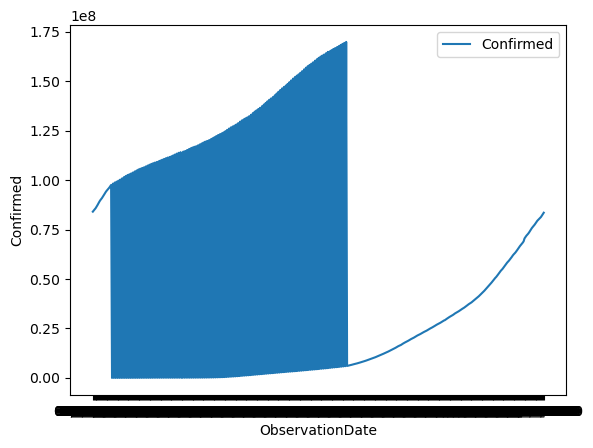

In [20]:
#line plot
import seaborn as sns
sns.lineplot(data=df_time, x='ObservationDate', y='Confirmed', label='Confirmed')

<Axes: xlabel='ObservationDate', ylabel='Deaths'>

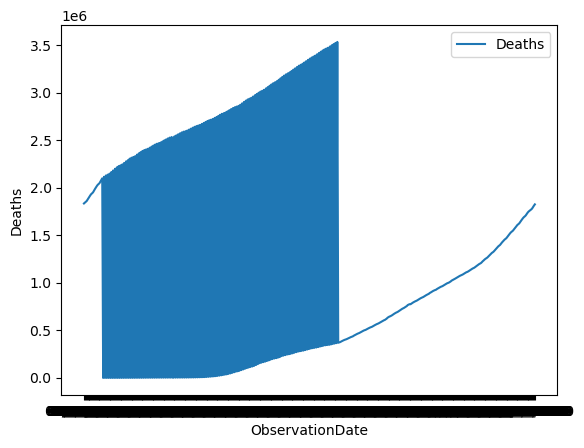

In [21]:
sns.lineplot(data=df_time, x='ObservationDate', y='Deaths', label='Deaths')


# 5. Geographical Analysis:

Analyze the distribution of cases across different countries/regions.<br>
Create geographical visualizations (e.g., world map).

In [ ]:
# Geographical analysis
# df_country = df.groupby('Country/Region').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})

# Plot geographical data
# sns.barplot(x=df_country.index, y='Confirmed', data=df_country)



In [34]:
df_Country=df.groupby('Country/Region').agg({'Confirmed':'sum','Deaths':'sum','Recovered':'sum'})


<Axes: xlabel='Country/Region', ylabel='Confirmed'>

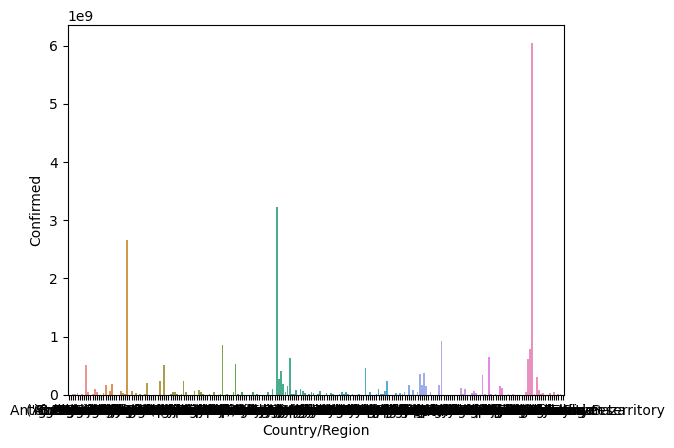

In [35]:
import seaborn as sns
sns.barplot(x=df_Country.index, y='Confirmed',data=df_Country)

# 6. Correlation Analysis:

Examine the correlation between different numeric variables.

In [8]:
# Correlation analysis between confirmed,deaths and recovered

# Plot correlation on heat map
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [19]:
#correlation
df[['Confirmed','Deaths','Recovered']].corr()

,Confirmed,Deaths,Recovered
Confirmed,1.000000,0.888416,0.633479
Deaths,0.888416,1.000000,0.538416
Recovered,0.633479,0.538416,1.000000


In [6]:
#plot correlation matrix
correlation_matrix=df[['Confirmed','Deaths','Recovered']].corr()


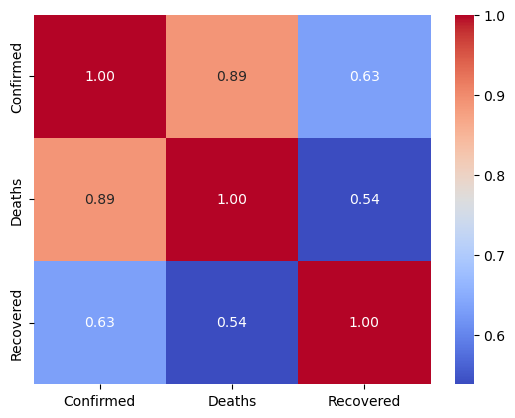

NameError: name 'lt' is not defined

In [9]:
#plot heat map
import seaborn as sns
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f")
plt.show()
lt.title('Correlation Matrix')

# 7. Advanced Analysis:

Explore advanced visualizations or statistical tests based on the specific questions you want to answer.

In [22]:
# Calculate the total number of confirmed cases, deaths, and recoveries for each country/region.

df.groupby('Country/Region').agg({'Confirmed':'sum','Deaths':'sum','Recovered':'sum'})

,Confirmed,Deaths,Recovered
Country/Region,,,
Azerbaijan,1.0,0.0,0.0
"('St. Martin',)",2.0,0.0,0.0
Afghanistan,17026442.0,669075.0,13464399.0
Albania,19768869.0,375955.0,13945256.0
Algeria,27684358.0,834464.0,18959299.0
...,...,...,...
West Bank and Gaza,41819444.0,440378.0,37003116.0
Yemen,962066.0,237613.0,506523.0
Zambia,13493953.0,205990.0,12625626.0


In [23]:
#death
df['Deaths'].sum()

624013017.0

In [24]:
df["Recovered"].sum()

15450237912.0

In [25]:
# Identify the countries/regions with the highest number of confirmed cases, deaths, and recoveries.
df.groupby('Country/Region').agg({'Confirmed':'max','Deaths':'max','Recovered':'max'})


,Confirmed,Deaths,Recovered
Country/Region,,,
Azerbaijan,1.0,0.0,0.0
"('St. Martin',)",2.0,0.0,0.0
Afghanistan,70111.0,2899.0,57281.0
Albania,132297.0,2449.0,129215.0
Algeria,128456.0,3460.0,89419.0
...,...,...,...
West Bank and Gaza,307838.0,3492.0,300524.0
Yemen,6731.0,1319.0,3399.0
Zambia,94751.0,1276.0,91594.0


In [ ]:
# Visualize the distribution of deaths using bar chart
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=df['Deaths'], data=df)
plt.show()



<Axes: xlabel='Country/Region', ylabel='Deaths'>

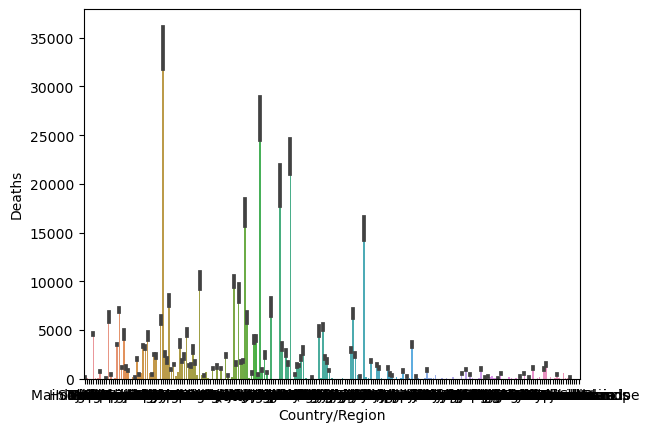

In [6]:
#barplot
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x='Country/Region', y='Deaths', data=df)